# Satellite imagery analysis - Filtering and Object Detection

In this notebook I will filter the clips of the Port of Los Angeles that have been downloaded from the Planet servers based on how much of the port is actually visible. We will see that many of the clips only have the Port partially visible. This is not good enough if we want to count the number of ships on any given day at that point in time - the area that is measured should stay the same.

Therefore, the first step is to import the images:

In [1]:
# Import the modules needed in this Notebook
import os
from IPython.display import display, Image, HTML
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imshow
import numpy as np
import rasterio

%matplotlib inline

In [2]:
# List of all files in the images folder
path = '..//..//..//Prep_Analysis//images//'
allfiles = os.listdir(path)

In [3]:
# Find only the .tif (GeoTif) files
tif_files = [file for file in allfiles if file.endswith('.tif')]

In [4]:
print('The number of .tif files in /images is: '+str(len(tif_files))) 

The number of .tif files in /images is: 120


We will open up a few images to see what they look like

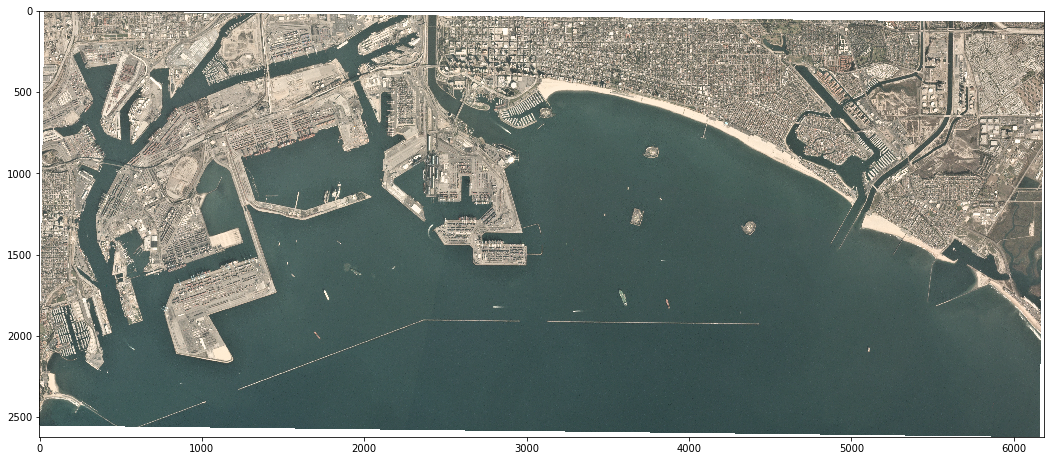

In [5]:
# Open and read the .tif file
img1 = rasterio.open(path+tif_files[0]).read()

# Display the image:
plt.figure(figsize = (18,36))
plt.imshow(np.dstack(img1))
plt.show()

In [6]:
# Find the non-zero pixel values in the first row of the first color (red)
non_zero = [(i,j) for i,j in enumerate(img1[0][0]) if j!=0]

In [7]:
non_zero

[(32, 226),
 (33, 222),
 (34, 212),
 (35, 202),
 (36, 193),
 (37, 180),
 (38, 186),
 (39, 195),
 (40, 249),
 (41, 255),
 (42, 255),
 (43, 255),
 (44, 255),
 (45, 255),
 (46, 255),
 (47, 255),
 (48, 255),
 (49, 255),
 (50, 255),
 (51, 255),
 (52, 250),
 (53, 229),
 (54, 203),
 (55, 182),
 (56, 190),
 (57, 189),
 (58, 219),
 (59, 239),
 (60, 232),
 (61, 193),
 (62, 186),
 (63, 175),
 (64, 170),
 (65, 170),
 (66, 160),
 (67, 158),
 (68, 171),
 (69, 177),
 (70, 181),
 (71, 145),
 (72, 111),
 (73, 95),
 (74, 101),
 (75, 109),
 (76, 97),
 (77, 93),
 (78, 101),
 (79, 119),
 (80, 122),
 (81, 125),
 (82, 140),
 (83, 152),
 (84, 143),
 (85, 128),
 (86, 130),
 (87, 135),
 (88, 150),
 (89, 154),
 (90, 169),
 (91, 188),
 (92, 194),
 (93, 202),
 (94, 201),
 (95, 190),
 (96, 174),
 (97, 172),
 (98, 169),
 (99, 164),
 (100, 172),
 (101, 188),
 (102, 204),
 (103, 203),
 (104, 205),
 (105, 205),
 (106, 206),
 (107, 202)]

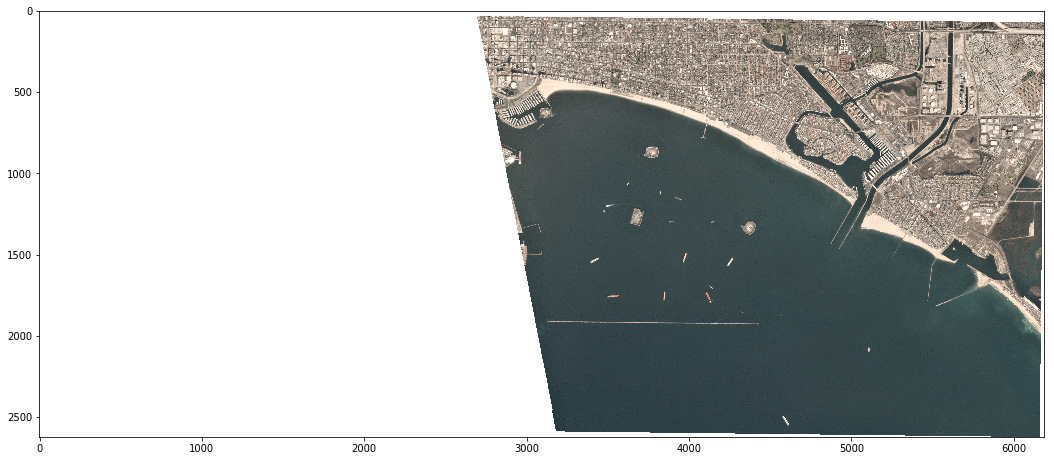

In [8]:
# We can see that from pixel 32 to 107, we have red intensities of varying amounts but nonzero.
# Let's look at another image:

# Open and read the .tif file
img2 = rasterio.open(path+tif_files[3]).read()

# Display the image:
plt.figure(figsize = (18,36))
plt.imshow(np.dstack(img2))
plt.show()

In [9]:
# Running the same code for finding non-zero values:
# Find the non-zero pixel values in the first row of the first color (red)
non_zero2 = [(i,j) for i,j in enumerate(img2[0][0]) if j!=0]

In [10]:
non_zero2

[]

In [11]:
# As would be assumed. Now if we go down to row 500:
non_zero500 = [(i,j) for i,j in enumerate(img2[0][500]) if j!=0]

In [12]:
# Display first ten
non_zero500[0:10]

[(2784, 243),
 (2785, 240),
 (2786, 240),
 (2787, 240),
 (2788, 240),
 (2789, 242),
 (2790, 242),
 (2791, 241),
 (2792, 235),
 (2793, 228)]

In [13]:
# After column 2784 we get non-zero values.

In [14]:
# Saving the red, green and blue arrays 
r = img1[0]
g = img1[1]
b = img1[2]

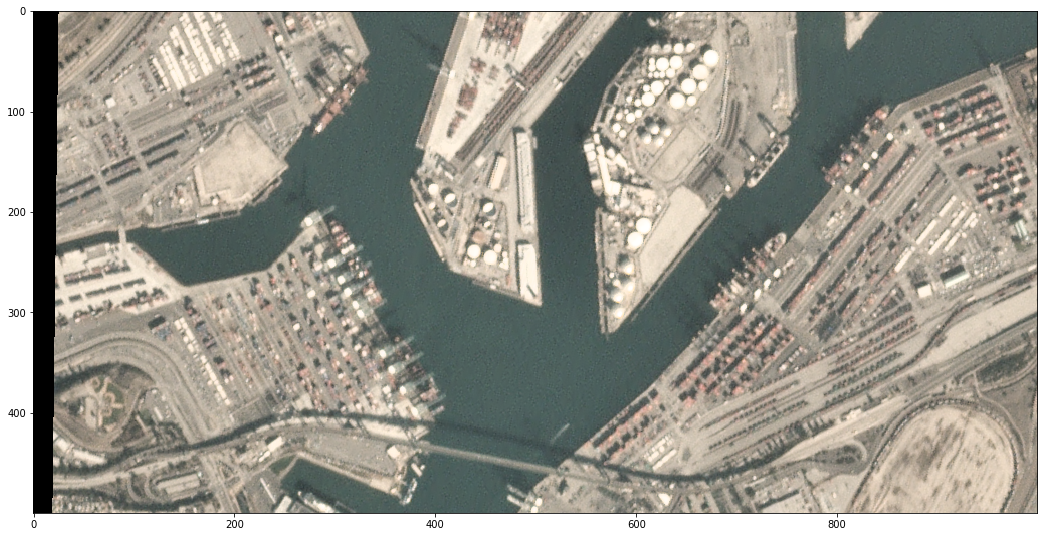

In [15]:
# Zoom in on a segement of the first image:
%matplotlib inline
plt.figure(figsize = (18,36))
plt.imshow(np.dstack([r[500:1000,0:1000],g[500:1000,0:1000],b[500:1000,0:1000]]))
plt.show()

In the above image we see there are a few container ships docked at the port either receiving or unloading cargo. We would like to ensure that all images in our list have these ports present in them. Therefore we will begin a list of necessary pixels

<IPython.core.display.Javascript object>


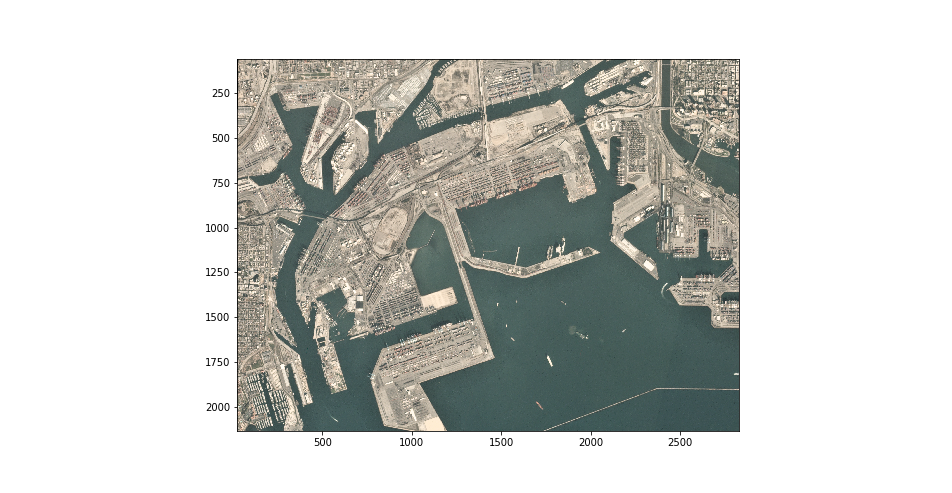

In [20]:
%matplotlib notebook
# Display the image:
#plt.figure(figsize = (18,36))
plt.imshow(np.dstack([r,g,b]))
plt.show()

In [ ]:
# Based on zooming in to areas of interest we have the following x,y coordinates for the ports:
port_coords = [[[270,335],[550,630]],[[275,420],[700,925]],[[400,480],[375,575]],]